## College Scorecard Merge
This notebook cleans the `merged_scorecard.csv` file from the Scorecard dataset.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

df = pd.read_csv('../data/processed/merged_scorecard.csv')

C:\Users\cambe\AppData\Local\Temp\ipykernel_29116\2377427905.py:5: DtypeWarning: Columns (1,9,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,66

### Key Variables for College Tuition & Student Loan Debt Analysis

#### Institution Info
- `INSTNM`: Institution Name
- `CITY`, `STABBR`, `ZIP`: Location info
- `CONTROL`: Institution control (1=Public, 2=Private nonprofit, 3=Private for-profit)
- `ICLEVEL`: Institution level (1=4-year, 2=2-year)
- `HBCU`, `PBI`, `HSI`, `TRIBAL`: Flags for minority-serving institutions

#### Tuition / Cost
- `TUITIONFEE_IN`, `TUITIONFEE_OUT`: In-state / out-of-state tuition
- `COSTT4_A`, `COSTT4_P`: Total academic year cost
- `NPT4_PUB`, `NPT4_PRIV`: Net price (public/private)
- `NPT41_PUB` to `NPT45_PUB`: Net price for income groups:
  - $0–$30k
  - $30k–$48k
  - $48k–$75k
  - $75k–$110k
  - $110k+

#### Student Loan / Debt
- `DEBT_MDN`, `GRAD_DEBT_MDN`: Median debt for all/graduate borrowers  
- `LO_INC_DEBT_MDN`, `MD_INC_DEBT_MDN`, `HI_INC_DEBT_MDN`: Median debt by income  
- `CUML_DEBT_N`: Number of students in cumulative debt  
- `PCTFLOAN`: % of students receiving federal loans  
- `LOAN_EVER`, `PELL_EVER`: % of students receiving federal or Pell loans  
- `DEP_DEBT_MDN`: Median debt for dependent students  
- `IND_DEBT_MDN`: Median debt for independent students  
- `PELL_DEBT_MDN`: Median debt for Pell recipients  
- `NOPELL_DEBT_MDN`: Median debt for non-Pell recipients  
- `FEMALE_DEBT_MDN`: Median debt for female students  
- `MALE_DEBT_MDN`: Median debt for male students  
- `FIRSTGEN_DEBT_MDN`: Median debt for first-generation students  
- `NOTFIRSTGEN_DEBT_MDN`: Median debt for non-first-generation students  

#### Financial Aid / Income
- `PCTPELL`, `PELL_EVER`: Pell Grant recipients (%)
- `PAR_ED_PCT_1STGEN`: % of first-gen college students
- `INC_PCT_LO`, `INC_PCT_M1`, `INC_PCT_H1`: % of students in each income tier

#### Post-Graduation Earnings
- `MD_EARN_WNE_P10`, `MN_EARN_WNE_P10`: Median / mean earnings 10 years after entry
- `COUNT_WNE_INC1_P10`, `COUNT_WNE_INC2_P10`, `COUNT_WNE_INC3_P10`: Earnings tier counts
- `MD_EARN_WNE_INC1_P10`, `MD_EARN_WNE_INC2_P10`, `MD_EARN_WNE_INC3_P10`: Median earnings after 10 years for groups
  - $0-$30,000
  - $30,001-$75,000
  - $75,001+

####  Loan Repayment Metrics
- `RPY_1YR_RT`, `RPY_3YR_RT`: 1-year and 3-year repayment rates
- `COMPL_RPY_3YR_RT`: Repayment rate for completers
- `NONCOM_RPY_3YR_RT`: Repayment rate for non-completers

#### Enrollment / Demographics
- `UGDS`: Undergraduate enrollment total
- `UGDS_WHITE`, `UGDS_BLACK`, `UGDS_HISP`, `UGDS_ASIAN`: % by race/ethnicity
- `UGDS_AIAN`, `UGDS_NHPI`, `UGDS_2MOR`, `UGDS_UNKN`: Other race categories (American Indian/Native Alaskan, Native Hawaiian/Pacific Islander)
- `FEMALE`: Gender distribution (MALE = 1 - FEMALE)
- `VETERAN`: Share of veteran students
- `FIRST_GEN`: Share of first generation students
- `DEPENDENT`: Dependency status (INDEPENDENT = 1 - DEPENDENT)
- `AGE_ENTRY`: Average age of entry

#### Completion / Retention
- `RET_FT4`, `RET_PT4`: Retention (full-time, part-time)
- `C150_4`, `C150_L4`: Graduation within 150% of program time
- `WDRAW_ORIG_YR2_RT`: withdrawal by year 2
- `COMP_ORIG_YR2_RT`, `ENRL_ORIG_YR2_RT`: Completion/enrollment by year 2
- `D150_4`: Disaggregated 150% grad rate

In [10]:
columns_to_keep = [
    # Institution Info
    "INSTNM", "CITY", "STABBR", "ZIP", "CONTROL", "ICLEVEL", "HBCU", "PBI", "HSI", "TRIBAL",
    
    # Tuition / Cost
    "TUITIONFEE_IN", "TUITIONFEE_OUT", "COSTT4_A", "COSTT4_P", "NPT4_PUB", "NPT4_PRIV",
    "NPT41_PUB", "NPT42_PUB", "NPT43_PUB", "NPT44_PUB", "NPT45_PUB",
    
    # Student Loan / Debt
    "DEBT_MDN", "GRAD_DEBT_MDN", "LO_INC_DEBT_MDN", "MD_INC_DEBT_MDN", "HI_INC_DEBT_MDN",
    "CUML_DEBT_N", "PCTFLOAN", "LOAN_EVER", "PELL_EVER", "DEP_DEBT_MDN", "IND_DEBT_MDN",
    "PELL_DEBT_MDN", "NOPELL_DEBT_MDN", "FEMALE_DEBT_MDN", "MALE_DEBT_MDN",
    "FIRSTGEN_DEBT_MDN", "NOTFIRSTGEN_DEBT_MDN",
    
    # Financial Aid / Income
    "PCTPELL", "PELL_EVER", "PAR_ED_PCT_1STGEN", "INC_PCT_LO", "INC_PCT_M1", "INC_PCT_H1",
    
    # Post-Graduation Earnings
    "MD_EARN_WNE_P10", "MN_EARN_WNE_P10",
    "COUNT_WNE_INC1_P10", "COUNT_WNE_INC2_P10", "COUNT_WNE_INC3_P10",
    "MD_EARN_WNE_INC1_P10", "MD_EARN_WNE_INC2_P10", "MD_EARN_WNE_INC3_P10",
    
    # Loan Repayment Metrics
    "RPY_1YR_RT", "RPY_3YR_RT", "COMPL_RPY_3YR_RT", "NONCOM_RPY_3YR_RT",
    
    # Enrollment / Demographics
    "UGDS", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN",
    "UGDS_AIAN", "UGDS_NHPI", "UGDS_2MOR", "UGDS_UNKN", "FEMALE",
    "VETERAN", "FIRST_GEN", "DEPENDENT", "AGE_ENTRY",
    
    # Completion / Retention
    "RET_FT4", "RET_PT4", "C150_4", "C150_L4", "WDRAW_ORIG_YR2_RT",
    "COMP_ORIG_YR2_RT", "ENRL_ORIG_YR2_RT", "D150_4"
]

print(df.columns.tolist())

reduced_df = df[columns_to_keep]

['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'INSTURL', 'NPCURL', 'SCH_DEG', 'HCM2', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'ST_FIPS', 'REGION', 'LOCALE', 'LOCALE2', 'LATITUDE', 'LONGITUDE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'ADM_RATE', 'ADM_RATE_ALL', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID', 'SATWRMID', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25', 'ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID', 'SAT_AVG', 'SAT_AVG_ALL', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCI

### Save the reduced dataframe

In [16]:
output_path = Path("../data/processed/reduced_scorecard.csv")

reduced_df.to_csv(output_path, index=False)
print(f"Saved reduced dataset to {output_path}")

Saved reduced dataset to ..\data\processed\reduced_scorecard.csv


#### Visualizations

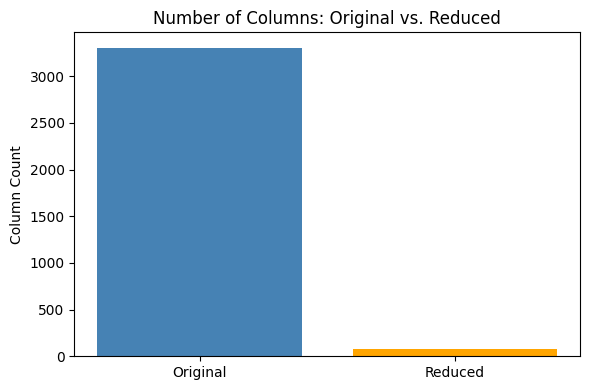

In [13]:
plt.figure(figsize=(6, 4))
plt.bar(['Original', 'Reduced'], [df.shape[1], reduced_df.shape[1]], color=['steelblue', 'orange'])
plt.title('Number of Columns: Original vs. Reduced')
plt.ylabel('Column Count')
plt.tight_layout()
plt.show()

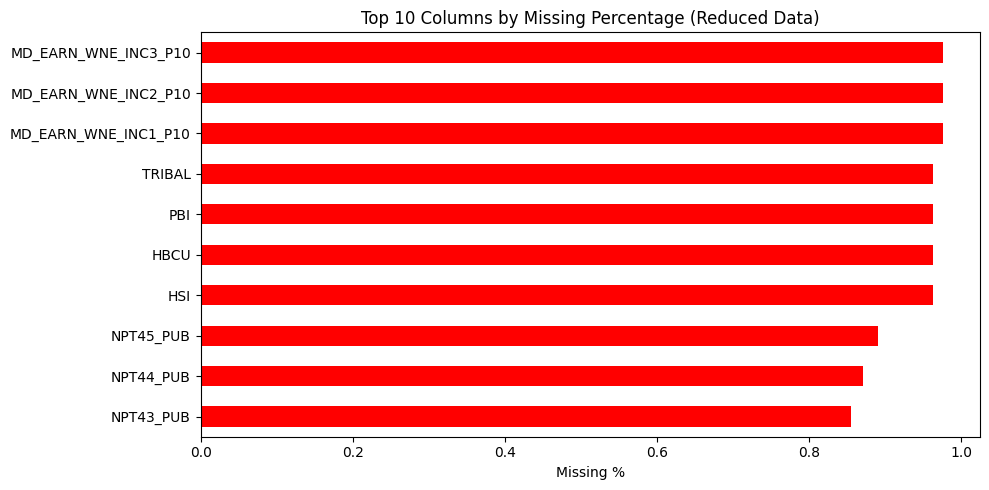

In [ ]:
import matplotlib.cm as cm
import numpy as np

def get_missing_percentages(df):
    return df.isnull().mean().sort_values(ascending=False)

original_missing = get_missing_percentages(df)
reduced_missing = get_missing_percentages(reduced_df)

# Plot top 10 columns with the highest missingness (in reduced_df)
top_missing = reduced_missing.head(10)

# Normalize values for colormap
norm = plt.Normalize(top_missing.min(), top_missing.max())
colors = cm.viridis(norm(top_missing.values))  # or any other colormap

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_missing.index, top_missing.values, color=colors)

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2%}', va='center')

plt.xlabel('Missing %')
plt.title('Top 10 Columns by Missing Percentage (Reduced Data)')
plt.gca().invert_yaxis()  # Highest value on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

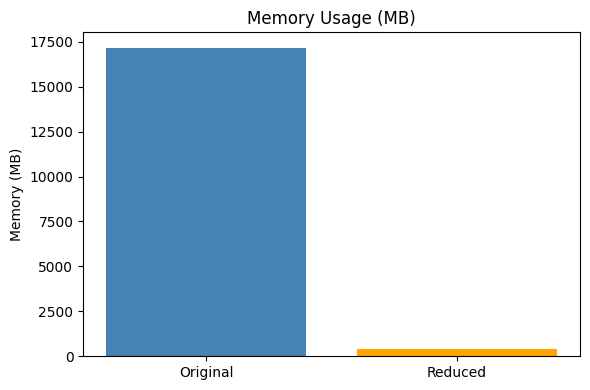

In [19]:
original_mem = df.memory_usage(deep=True).sum() / 1e6
reduced_mem = reduced_df.memory_usage(deep=True).sum() / 1e6

plt.figure(figsize=(6, 4))
plt.bar(['Original', 'Reduced'], [original_mem, reduced_mem], color=['steelblue', 'orange'])
plt.title('Memory Usage (MB)')
plt.ylabel('Memory (MB)')
plt.tight_layout()
plt.show()

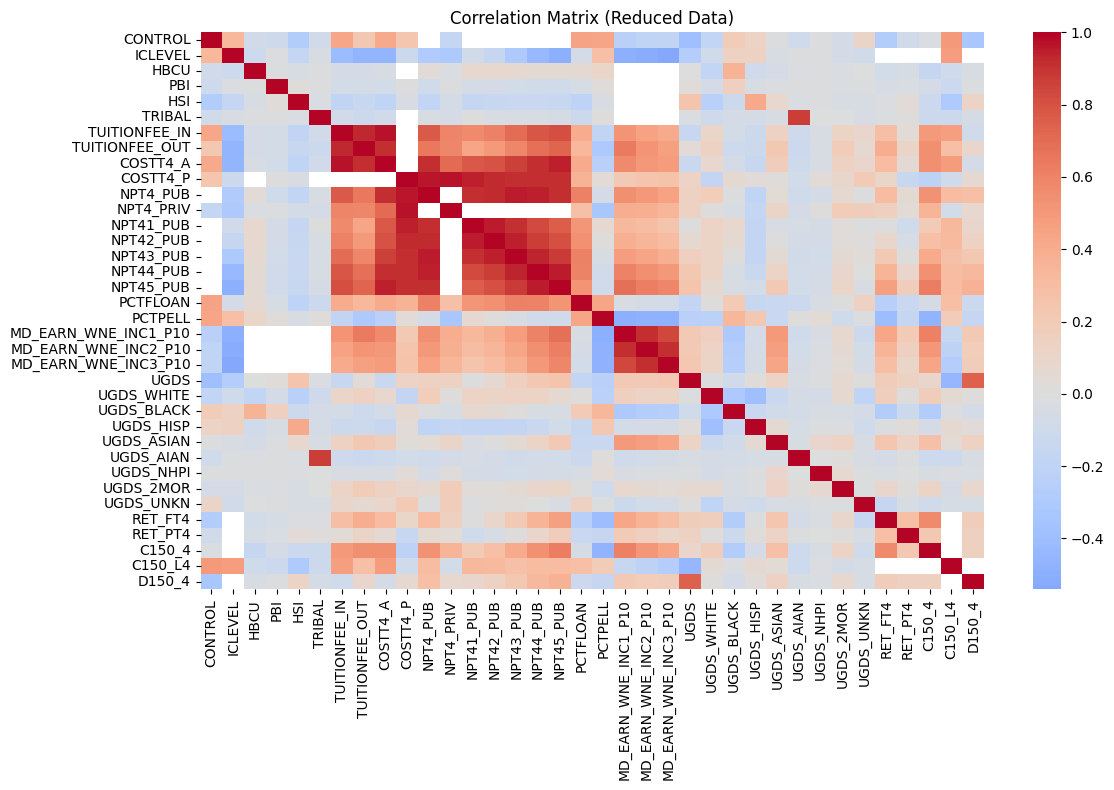

In [23]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(reduced_df.select_dtypes(include='number').corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Reduced Data)')
plt.tight_layout()
plt.show()